# Tối ưu hóa Pareto

### BS. Lê Ngọc Khả Nhi

## Đặt vấn đề 

Tối ưu hóa Pareto là một khái niệm trong kinh tế học, được đặt tên theo Vilfredo Pareto (1848-1923), một nhà kinh tế và chính trị gia người Ý và được ứng dụng trong nhiều lĩnh vực. 

Cho một hệ thống xác định, sự cải thiện Pareto nhằm đạt đến trạng thái cân bằng tốt nhất giữa các mục tiêu. Thí dụ trong y học: một phác đồ kết hợp nhiều loại thuốc có thể đạt hiệu quả tích cực cho một vài bệnh lý trên một số bệnh nhân nhưng có thể dẫn đến hệ quả tiêu cực cho một vài cá thể hay bệnh lý khác. Lúc này, ta có một bài toán tối ưu hóa nhiều mục tiêu.

Ta có thể mô phỏng bài toán này bằng một tập hợp 3 tiêu chí lâm sàng x,y,z được ghi nhận trên 2000 bệnh nhân, nhiệm vụ đặt ra là dùng một algorithm để xác định Pareto front, là tập hợp các đơn vị quan sát (vị trí trong không gian dữ liệu 3 chiều x,y,z đạt trạng thái hiệu quả Pareto.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def sim_parero(size = 2000):
    
    def fun_x(x, scale = 2.5, shape = 1.5):
        return (shape / scale) \
               *(x / scale)**(shape - 1) \
               *np.exp(-1 * (x / scale)**shape)

    def fun_y(x, fx):
        return np.exp(-x) * fx
    
    def fun_z(x, y):
        return -(x + y)**4 + 2*(x+y) \
               + np.random.normal(1,1.5,len(x))
    
    x = np.random.uniform(0,1,size)
    rn = np.random.normal(1,1.5,size)
    
    y = fun_y(x,fun_x(x, 2.5, 1.5)) + fun_y(rn, fun_x(rn)) + 0.5
    
    x = x[~np.isnan(y)]
    y = y[~np.isnan(y)]
    
    z = fun_z(x,y)
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, alpha = 0.5, c='black')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    return x,y,z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


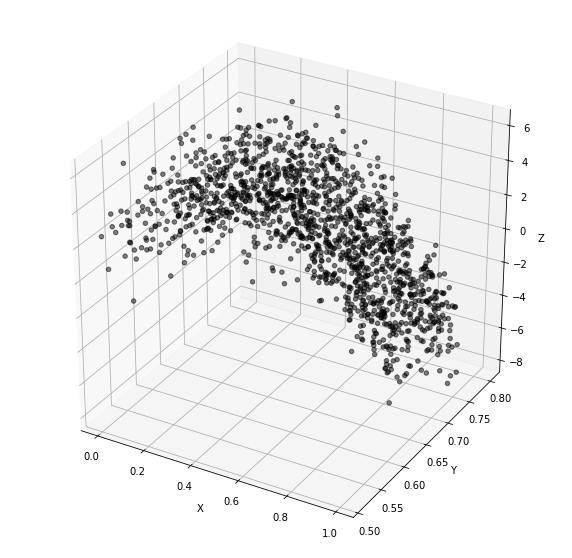

In [6]:
x,y,z = sim_parero(size = 2000)

## Algorithm tìm Pareto front cho n-d array

Algorithm xác định Pareto front của một array đa chiều, sử dụng cơ chế đệ quy, được cải biên từ code của Ragheb Rahmaniani (https://github.com/Ragheb2464/preto-front)

In [12]:
def half_split(H2,H1):
    if H1.shape[0] == 0:
        return H1
    
    for i in range(len(H2)):
        mask = (H1 > H2[i]).any(1)
        H1 = H1[mask[:]]
        if len(H1) == 0:
            break
    return H1

def Pareto_front(data):    
    dim = len(data)
    if dim == 1:
        return data
    else:
        idx = round(dim/2)
        H2 = Pareto_front(data[:idx])
        H1 = Pareto_front(data[idx:])
        
        PF = np.concatenate([H2, half_split(H2, H1)])
        
        return PF

Áp dụng algorithm này cho dữ liệu 3 chiều x,y,z:

In [13]:
data = np.array([list(i) for i in zip(x,y,z)])

data.shape

(1469, 3)

Kết quả là 1 tập hợp các điểm trong không gian 3 chiều:

In [18]:
pf = Pareto_front(data)

pf[:5]

array([[ 0.65686342,  0.79019669, -1.92466475],
       [ 0.40840243,  0.72091986,  2.43378688],
       [ 0.97664252,  0.72481667, -5.59359287],
       [ 0.76536754,  0.63394294, -1.19381799],
       [ 0.92148623,  0.68963899, -1.40332616]])

Hiển thị Pareto front trong không gian 3 chiều:

Text(0, 0.5, 'Y')

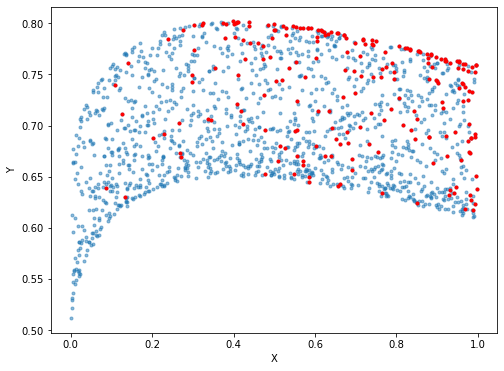

In [28]:
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(x,y, '.', alpha = 0.5)

plt.plot(pf[:,0],pf[:,1],'.', 
         **{'c':'red',
            'linewidth':3})

plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Z')

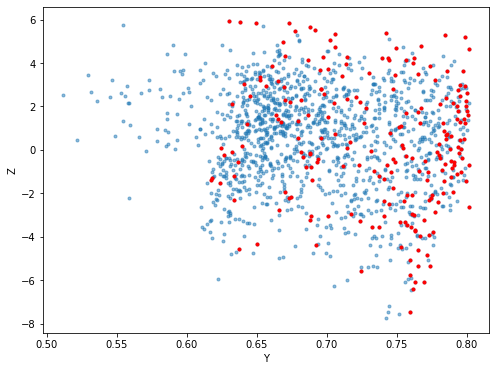

In [30]:
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(y,z, '.', alpha = 0.5)

plt.plot(pf[:,1],pf[:,2],'.', 
         **{'c':'red',
            'linewidth':3})

plt.xlabel('Y')
plt.ylabel('Z')

Text(0, 0.5, 'Z')

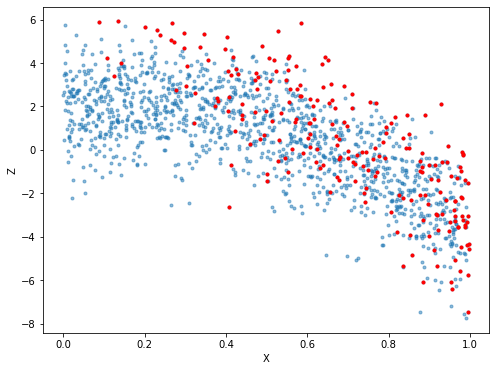

In [31]:
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(x,z, '.', alpha = 0.5)

plt.plot(pf[:,0],pf[:,2],'.', 
         **{'c':'red',
            'linewidth':3})

plt.xlabel('X')
plt.ylabel('Z')

Text(0.5, 0, 'Z')

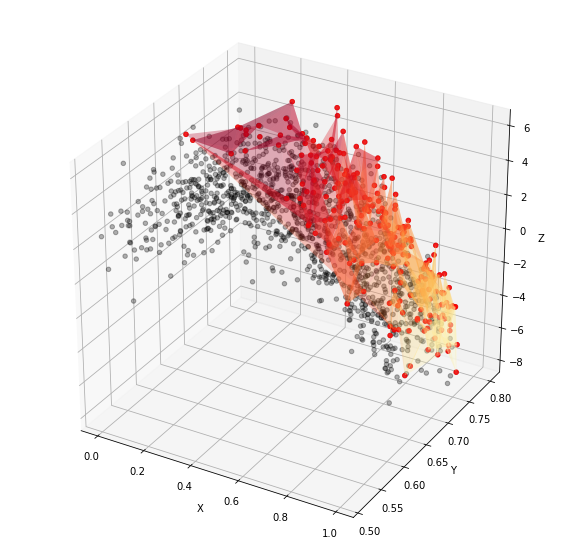

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, alpha = 0.3, c='black')

ax.scatter(pf[:,0],
          pf[:,1],
          pf[:,2],
           c ='red',
          alpha = 0.8)

ax.plot_trisurf(pf[:,0],
                pf[:,1],
                pf[:,2],
                linewidth = 0,
                edgecolor='none',
                alpha = 0.3,
                cmap = cm.YlOrRd,
               antialiased=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')